# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` and `resnet.py` files.

# Env setup
You can either create your own environment and install the packages manually, or use the following commands to create a conda environment with the required packages. Before running the commands, edit the two .yml file prefixes to match the path to your miniconda path. Setting up an environment is always tricky. You will most likely run into errors. Don't feel bad looking up the errors on Google and asking for assistance after trying to resolve the issue.
</br>
</br>
If you are using Windows and running into errors, try omitting the word 'env' from the following commands. Mileage may vary with other OS's, so it may take a bit of debugging.
</br>
</br>
Below, I provide two methods of setting up your environment: `Env Environment Based on My Yaml Files` and `Alternative Method - Custom Built Environment`. Try to use the first method, but if you run into issues, try the second method. **** You do not need to run both methods!!! **** Just get one of them working.


# Env Environment Based on My Yaml Files:

## BIE Environment:

In [ ]:
# ! conda create --name BIE_conversion
# ! conda activate BIE_conversion
# ! conda env update --name BIE_conversion --file ./conda_envs/BIE_conversion.yml

## Keras GPU Environment:

In [ ]:
# ! conda create --name keras_gpu
# ! conda activate keras_gpu
# ! conda env update --name keras_gpu --file ./conda_envs/keras_gpu.yml

# Alternative Method - Custom Built Environment:
If the previous methods didn't work, try this method. It will create a gpu environment with the necessary libraries:

In [ ]:
# # Installations for alternative method
# ! conda create --name keras_gpu keras-gpu tensorflow-gpu
# ! conda activate keras_gpu
# ! conda install -c anaconda pandas=1.4.1
# ! conda install -c anaconda matplotlib=3.5.1
# ! conda install -c anaconda numpy=1.18.5
# ! conda install -c anaconda bitstring=3.1.9
# ! conda install -c anaconda joblib=1.1.0
# ! conda install -c anaconda pillow=8.2.0

## Env Setup Conclusion
There is a high likelihood that you will run into errors. If you do, don't feel bad. It's a learning experience. If you are still having issues, feel free to reach out to me for assistance. Try modifying the files as necessary and looking up the errors on Google. This process will likely take some time and be the hardest part of using this notebook.

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        4.0.1
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '../data/csv/breastCancer.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples

classification_id = 'diagnosis'
df = add_id_column(df, classification_id)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Id
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1-M
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2-M
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,3-M
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,4-M
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,5-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,209-M
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,210-M
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,211-M
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,212-M


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here!
# For example, if you have missing values, you can fill them in with the mean value of the column or drop them
# Look at our past work for examples of how to do this
# Kaggle is another good resource

#def diagnosis_to_binary(row):
 #   if row.diagnosis == 'M':
  #      row.diagnosis = 1
   # elif row.diagnosis == 'B':
    #    row.diagnosis = 0
    #return row

#df.apply(diagnosis_to_binary, axis='columns')

In [8]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
Y = df[classification_id]
x = df.drop([classification_id, 'id', 'Id'], axis=1)
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (569, 30)
Y (569,)
This value should be True: True


## Image Generation

In [9]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change

# image_directory = "results_breastCancer"
image_directory = "../breastCancer-Data/results_breastCancer"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [11]:
organize_photos_in_folders(image_directory, Y)

M
B
569
{'M': 212, 'B': 357}


In [12]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [21]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [22]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 2
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [ ]:
new_dir = image_directory + '/data'
print("\n", 
    num_classes,  "\n",
    img_size,  "\n",
    f"{new_dir}/Train/",  "\n",
    number_of_epochs,  "\n",
    f"{image_directory}/results/",  "\n",
    num_folds,  "\n",
    batch_size
)
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [ ]:
print("Average metrics over k folds")
print(average_history)

In [ ]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

In [ ]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [13]:
#FIXME - update the directories to point where you would like
image_directory = "image-results-breastCancer-correlated"
# new_dir = image_directory + '/data/'
new_dir = image_directory + '/data'

In [14]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: diagnosis, 33, ['M' 'B']


In [15]:
correlated_df = df.reindex(columns=correlated_order)

In [16]:
# x = correlated_df.drop([classification_id, 'Id', 'id'], axis=1)
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (569, 31)
Y (569,)
This value should be True: True


In [17]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "../breastCancer-Data/image-results-breastCancer-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [18]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [19]:
organize_photos_in_folders(image_directory, Y)

M
B
569
{'M': 212, 'B': 357}


In [23]:
print("\n", 
    num_classes,  "\n",
    img_size,  "\n",
    f"{new_dir}/Train/",  "\n",
    number_of_epochs,  "\n",
    f"{image_directory}/results/",  "\n",
    num_folds,  "\n",
    batch_size
)
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)


 2 
 64 
 image-results-breastCancer-correlated/data/Train/ 
 100 
 image-results-breastCancer-correlated/results/ 
 5 
 32
Fold:  0
Found 456 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


c:\Users\aavil\miniconda3\envs\keras_gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\aavil\miniconda3\envs\keras_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
15/15 [==============================] - 22s 572ms/step - loss: 1.0718 - acc: 0.5811 - f1_m: 0.5833 - precision_m: 0.5833 - recall_m: 0.5833 - auc: 0.6174 - false_negatives: 191.0000 - false_positives: 191.0000 - true_negatives: 265.0000 - true_positives: 265.0000 - mean_absolute_error: 0.4346 - mean_squared_error: 0.2953 - val_loss: 7.1575 - val_acc: 0.6283 - val_f1_m: 0.6512 - val_precision_m: 0.6512 - val_recall_m: 0.6512 - val_auc: 0.6283 - val_false_negatives: 42.0000 - val_false_positives: 42.0000 - val_true_negatives: 71.0000 - val_true_positives: 71.0000 - val_mean_absolute_error: 0.3717 - val_mean_squared_error: 0.3717

Epoch 00001: val_acc improved from -inf to 0.62832, saving model to image-results-breastCancer-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.63.hdf5
Epoch 2/100
15/15 [==============================] - 1s 71ms/step - loss: 0.4037 - acc: 0.8443 - f1_m: 0.8396 - precision_m: 0.8396 - recall_m: 0.8396 - auc: 0.9077 - false_negatives: 71.

In [24]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.015089686459396035, 'acc': 0.9956140398979187, 'f1_m': 0.9933333277702332, 'precision_m': 0.9933333277702332, 'recall_m': 0.9933333277702332, 'auc': 0.999927818775177, 'false_negatives': 1.0, 'false_positives': 1.0, 'true_negatives': 455.0, 'true_positives': 455.0, 'mean_absolute_error': 0.010259499552194028, 'mean_squared_error': 0.0036055709963875417, 'val_loss': 0.2826164573431015, 'val_acc': 0.9150442361831665, 'val_f1_m': 0.9139705300331116, 'val_precision_m': 0.9139705896377563, 'val_recall_m': 0.9139705896377563, 'val_auc': 0.9879395365715027, 'val_false_negatives': 7.0, 'val_false_positives': 7.0, 'val_true_negatives': 106.0, 'val_true_positives': 106.0, 'val_mean_absolute_error': 0.09510615020990372, 'val_mean_squared_error': 0.0674678422510624, 'lr': 0.00010159999310417333}


In [25]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.017626380547881126, 'acc': 0.9978070259094238, 'f1_m': 0.9979166388511658, 'precision_m': 0.9979166388511658, 'recall_m': 0.9979166388511658, 'auc': 0.999927818775177, 'false_negatives': 1.0, 'false_positives': 1.0, 'true_negatives': 455.0, 'true_positives': 455.0, 'mean_absolute_error': 0.01448414009064436, 'mean_squared_error': 0.003192526288330555, 'val_loss': 0.14209182560443878, 'val_acc': 0.9380530714988708, 'val_f1_m': 0.9453124403953552, 'val_precision_m': 0.9453125, 'val_recall_m': 0.9453125, 'val_auc': 0.9879395365715027, 'val_false_negatives': 7.0, 'val_false_positives': 7.0, 'val_true_negatives': 106.0, 'val_true_positives': 106.0, 'val_mean_absolute_error': 0.09089631587266922, 'val_mean_squared_error': 0.04687226191163063, 'lr': 0.00049999997}


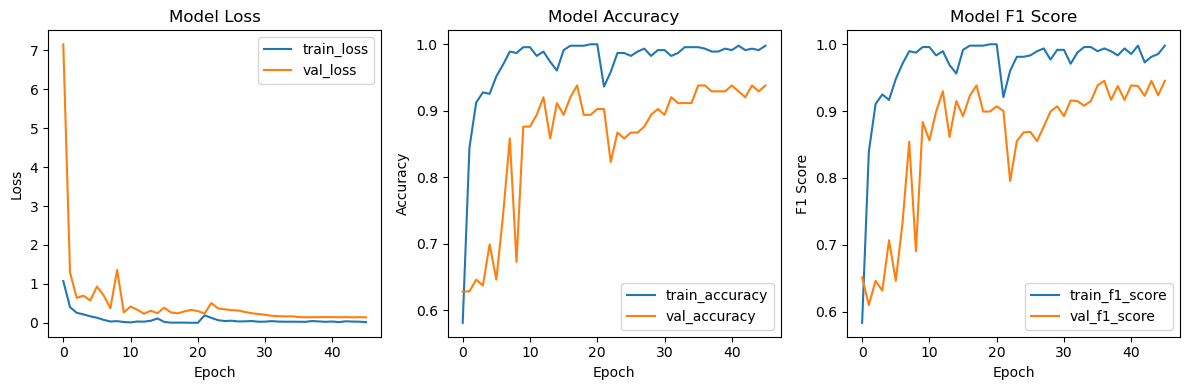

In [26]:
plot_metrics(best_model.history)

# DELETE after further experimentation

### Don't worry about this part!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)-10):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris-correlated/data/Train",
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

In [ ]:
# print imgs[0] as an image
plt.imshow(imgs[0])

In [ ]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/data/Train",target_size=(64,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

In [ ]:
plt.imshow(imgs[0])

In [ ]:
plt.imshow(imgs[0])

# TEST

In [ ]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(4,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])

In [ ]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(12,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])